In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import scipy

import tensorflow as tf

# set seeds
random_seed = 36
np.random.seed(random_seed)
tf.random.set_seed(int(random_seed))

import cartopy
#nice figures
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.dpi']= 150
mpl.rcParams['font.size'] = 12

import scipy as sp
import scipy.ndimage

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import ticker

## Load Data & Create Composites

In [2]:
#load the images and their classes
x_train = np.load("data/train_imgs_1996-2011.npy")
y_train = np.load("data/train_classes_1996-2011.npy")

x_val = np.load("data/validation_imgs_2012-2013.npy")
y_val = np.load("data/validation_classes_2012-2013.npy")

x_test = np.load("data/test_imgs_2014-2017.npy")
y_test = np.load("data/test_classes_2014-2017.npy")

In [3]:
y_count, y_label = np.histogram(y_train, [0,1,2,3,4,5,6])

In [4]:
arr_0 = np.zeros([136,136])
arr_1 = np.zeros([136,136])
arr_2 = np.zeros([136,136])
arr_3 = np.zeros([136,136])
arr_4 = np.zeros([136,136])
arr_5 = np.zeros([136,136])

for i in range(len(y_train)):    
    if y_train[i] == 0:
       arr_0 = arr_0 + x_train[i,:,:,0]
        
    elif y_train[i] == 1:
        arr_1 = arr_1 + x_train[i,:,:,0]
        
    elif y_train[i] == 2:
        arr_2 = arr_2 + x_train[i,:,:,0]
        
    elif y_train[i] == 3:
        arr_3 = arr_3 + x_train[i,:,:,0]

    elif y_train[i] == 4:
        arr_4 = arr_4 + x_train[i,:,:,0]
        
    elif y_train[i] == 5:
        arr_5 = arr_5 + x_train[i,:,:,0]


comp_0 = arr_0/y_count[0]
comp_1 = arr_1/y_count[1]
comp_2 = arr_2/y_count[2]
comp_3 = arr_3/y_count[3]
comp_4 = arr_4/y_count[4]
comp_5 = arr_5/y_count[5]


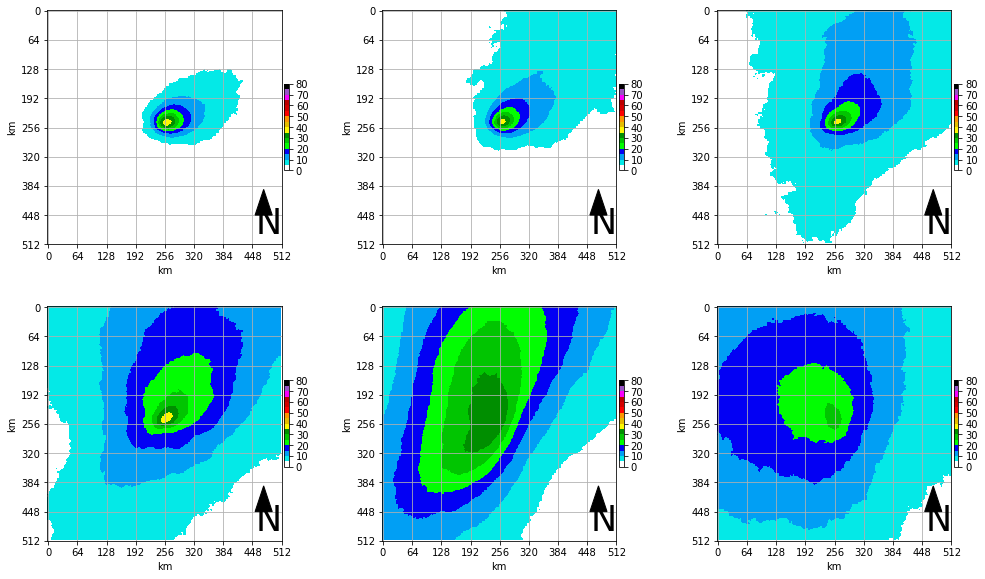

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from svrimg.mapping.map_helper import radar_colormap, draw_box_plot
from matplotlib.colors import BoundaryNorm

cmap = radar_colormap()
classes = np.array(list(range(0, 85, 5)))
norm = BoundaryNorm(classes, ncolors=cmap.N)

plt.rcParams['figure.figsize'] = 17, 10

for i in range(6):
    ax = plt.subplot(2,3,i+1)
    sample = locals()[f'comp_{i}']
    draw_box_plot(ax, sample.squeeze())